# Запуск модели с фиксированными параметрами и различными значениями начального состояния псевдослучайного генератора

* Запустим модель с указанием параметра S для получения количества шагов, пройденных моделью, в качестве возвращаемого значения
* Создается модель на поле 3000x3000
* Создаются 200 хищников и 200 жертв
* Значения начального состояния псевдослучайного генератора итерируются от 0 до 1000

Запуск модели осуществляется 1000 раз, в пуле отдельных процессов

In [4]:
from multiprocessing import Pool

import ppmodel
from ppmodel import ModelParams


if __name__ == '__main__':
    p = Pool(4)
    params = []
    for i in range(0, 100):
        params.append(ModelParams("S", 100, 100, 15, 15, 10, 5, i))
    steps = p.map(ppmodel.f, params)

В массиве `steps` созранены результаты запуска модели

TODO: не хочу соврать, что тут происходит, предлагаю описать подробнее

In [5]:
import numpy as np

sorted(steps)
n_bins = int(np.ceil(np.sqrt(len(steps))))
sigma = np.std(steps)
mu = np.mean(steps)

# Гистограмма распределения длительности жизни модели

Построим гистограмму распределения вероятности длительности жизни модели

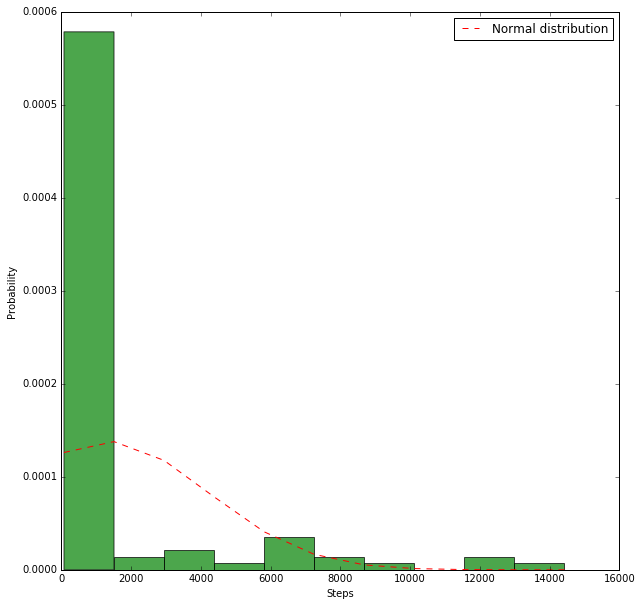

Maximum: 14424 steps
Maximum: 76 steps


In [6]:
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
%matplotlib inline


plt.figure(figsize=(10, 10))
n, bins, patches = plt.hist(steps, n_bins, normed=True, color="green", alpha=0.7,)

norm_pdf = mlab.normpdf(bins, mu, sigma)

plt.plot(bins, norm_pdf, "r--", label="Normal distribution")
plt.ylabel("Probability")
plt.xlabel("Steps")
plt.legend()
plt.show()

print("Maximum: %i steps" % (max(steps)))
print("Maximum: %i steps" % (min(steps)))